### Mandelbrot Set 

The Mandelbrot Set is defined as the set of complex numbers c such that the following sequence converge


$z_0 = 0$

$z_n = z_{n-1}^2+c$



Even though I could use libraries as cmath or numpy to use complex numbers I decided to implement it defining  
the class Complex with the adding, substraction, multiplication and division methods.


In [1]:
# Importing useful libraries

import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

In [2]:
# Defining the complex numbers class
class Complex():
    
    def __init__(self, real=0, imag=0): 
        self.real = real
        self.imag = imag

    def __add__(self,other):
        return Complex(self.real + other.real, self.imag + other.imag)
    
    def __mul__(self,other):
        return Complex(self.real * other.real - self.imag * other.imag,
                      self.real * other.imag + self.imag * other.real)
    
    def __sub__(self,other):
        return Complex(self.real - other.real, self.imag - other.imag)
    
    def __abs__(self):
        return (self.real**2+self.imag**2)**(1/2)

In [3]:
maxIter = 100

def mandelbrot(c):
    """
    Computes if a complex number remains to the Mandelbrot set.
    
    Parameters:
    c --> Complex number
    
    Returns: 1 if the point is mandelbrot, 0 otherwise.
    """
    n = 0
    succ = [Complex(), c]
    while (abs(succ[-1]) <= 2 and n < maxIter):
        z_n = succ[-1] * succ[-1] + c
        succ.append(z_n)
        n += 1
        
    if (n == maxIter): return 1
    else: return 0
    
        

In [4]:
def mandelbrot_set(c, width, height):
    """
    Computes the elements of the Mandelbrot Set inside some rectangle  and complex number c
    
    Parameters:
    c: complex number of type Complex
    width: integer
    height: integer
    
    Returns:
 
    mandelbrotSet: numpy array of shape height x width, full of 0 or 1 depending if the point remains to mandelbrot or not.
    
    """

    # 
    x_range = [c.real - 2, c.real + 1]
    y_range = [c.imag - 1, c.imag + 1]
    x_points = np.linspace(x_range[0], x_range[1], width)
    y_points = np.linspace(y_range[0], y_range[1], height)

    mandelbrotSet = np.array([[mandelbrot(Complex(x,y)) for x in x_points] for y in y_points]).reshape([height, width])
    
    return mandelbrotSet

In [5]:
# Mandelbrot Set centrated on c = 0
c = Complex(0, 0)
width = 1000
height = 666

In [6]:
man_set = mandelbrot_set(c, width, height)

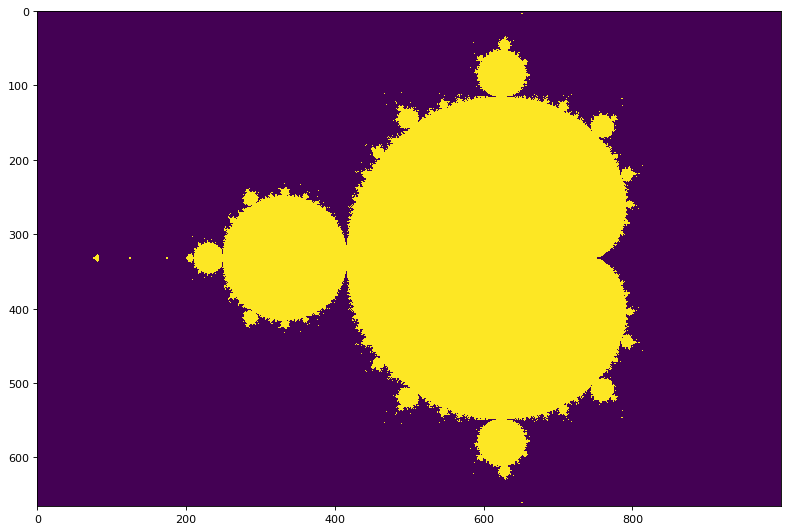

In [7]:
figure(num=None, figsize=(12, 14), dpi=80, facecolor='w', edgecolor='k')

img = plt.imshow(man_set)

In [8]:
plt.savefig('mandelbrot.jpg')

<Figure size 432x288 with 0 Axes>